In [1]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer #bow
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\91703\Downloads\spam.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
ham_words = ' '.join(df[df['Category'] == 'ham']['Message'].values)

In [5]:
ham_words

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if that\x92s the way u feel. That\x92s th

In [6]:
pip install WordCloud

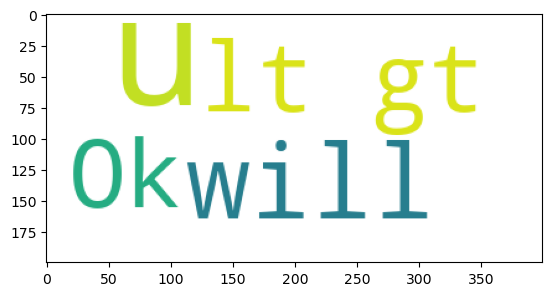

In [7]:
ham_plot = WordCloud(max_words=4, background_color='white').generate(ham_words)   #no significance for colr in the plot but there is signfnce in the size of the word
plt.imshow(ham_plot)                              # if the font size is more bigger then it occurd more times

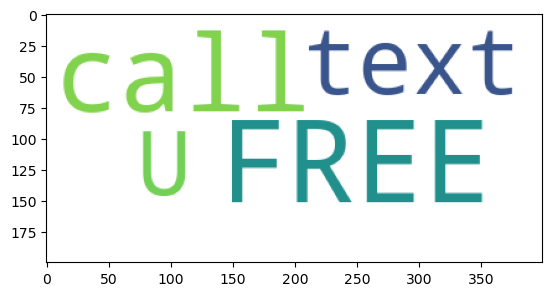

In [8]:
spam_words = ' '.join(df[df['Category'] == 'spam']['Message'].values)
spam_plot = WordCloud(max_words=4, background_color='white').generate(spam_words) 
plt.imshow(spam_plot)  

In [9]:
# no of spam and ham

<Axes: xlabel='Category'>

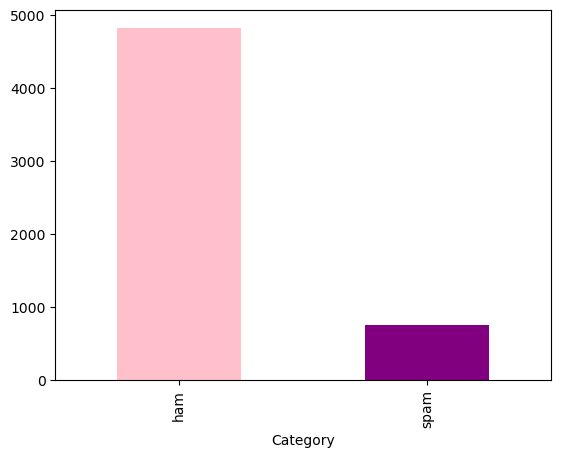

In [10]:
df['Category'].value_counts().plot(kind= 'bar',color = ['pink', 'purple'])

In [11]:
X = df.drop('Category',axis = 1)

In [12]:
X

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


### Bag of words

In [ ]:
bow = CountVectorizer(stop_words='english')

In [ ]:
bow

In [14]:
bow.fit(df['Message'])
X = bow.transform(df['Message']).toarray()
y = df['Category']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state= 23)

### knn

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [18]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9022421524663677

### navie bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9820627802690582

### decission t

In [21]:
from  sklearn.tree import DecisionTreeClassifier

In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.967713004484305

### svc

In [23]:
from sklearn.svm import SVC

In [24]:
S = SVC()
S.fit(X_train, y_train)
y_pred = S.predict(X_test)
accuracy_score(y_test,y_pred)

0.9775784753363229

### logistic

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
L = LogisticRegression()
L.fit(X_train, y_train)
y_pred = L.predict(X_test)
accuracy_score(y_test,y_pred)

0.9820627802690582

### deployment

In [27]:
email = input('enter email:')
data = bow.transform([email]).toarray()
result = nb.predict(data)[0]
result

enter email:Immediate Action Required: Virus Detected on Your Computer


'spam'

### pickle

In [28]:
import pickle

In [31]:
pickle.dump(nb,open('model.pkl','wb'))

In [33]:
model = pickle.load(open('model.pkl','rb'))

In [34]:
import os

In [38]:
email = 'Immediate Action Required: Virus Detected on Your Computer'

data = bow.transform([email]).toarray()

spam_ham = nb.predict(data)[0]
spam_ham

'spam'

In [40]:
os.getcwd()

'C:\\Users\\91703\\Untitled Folder 7'

In [36]:
m = pickle.load(open(r"C:\Users\91703\Untitled Folder 7\model.pkl",'rb'))

In [37]:
os.getcwd()

'C:\\Users\\91703\\Untitled Folder 7'